In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import f1_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay




# Dataset description

In [ ]:
train_data = pd.read_excel('/content/Training_Data_588_Project_Spring2025.xlsx')

print('(number of samples) X (number of features + 1 (label)): ', train_data.shape)

print('Number of samples in Class 1: ', train_data['Label'].sum(), ' Number of samples in Class 0: ', train_data['Label'].shape[0] - train_data['Label'].sum())

(number of samples) X (number of features + 1 (label)):  (185, 22)
Number of samples in Class 1:  14  Number of samples in Class 0:  171


In [ ]:
train_data = np.array(pd.read_excel('/content/Training_Data_588_Project_Spring2025.xlsx'))

test_data_1 = np.array(pd.read_excel('/content/Test_Data_588_Project_Spring2025.xlsx', 'Group-1'))
test_data_2 = np.array(pd.read_excel('/content/Test_Data_588_Project_Spring2025.xlsx', 'Group-2'))
test_data_3 = np.array(pd.read_excel('/content/Test_Data_588_Project_Spring2025.xlsx', 'Group-3'))
test_data_4 = np.array(pd.read_excel('/content/Test_Data_588_Project_Spring2025.xlsx', 'Group-4'))


if np.isnan(train_data).any():
    print("train_data contains NaN values. ", "Indices of NaN values (row, column):", np.argwhere(np.isnan(train_data)))

if np.isnan(test_data_1).any():
    print("test_data_1 contains NaN values. ", "Indices of NaN values (row, column):", np.argwhere(np.isnan(test_data_1)))

if np.isnan(test_data_2).any():
    print("test_data_2 contains NaN values. ", "Indices of NaN values (row, column):", np.argwhere(np.isnan(test_data_2)))

if np.isnan(test_data_3).any():
    print("test_data_3 contains NaN values. ", "Indices of NaN values (row, column):", np.argwhere(np.isnan(test_data_3)))

if np.isnan(test_data_4).any():
    print("test_data_4 contains NaN values. ", "Indices of NaN values (row, column):", np.argwhere(np.isnan(test_data_4)))


test_data_4 contains NaN values.  Indices of NaN values (row, column): [[59 13]]


In [ ]:
test_data_4 = pd.read_excel('/content/Test_Data_588_Project_Spring2025.xlsx', 'Group-4')
test_data_4.iloc[:,13]


,lf_hf_ratio
0,14.111771
1,6.302390
2,6.650452
3,5.657112
4,8.431558
...,...
95,9.410610
96,7.013789
97,4.379565
98,6.785975


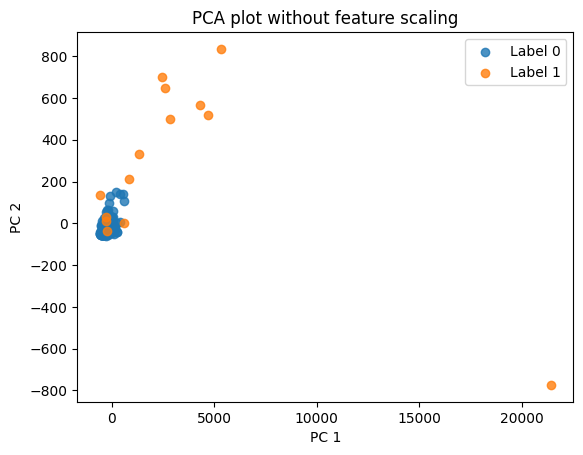

In [ ]:
train_data = pd.read_excel('/content/Training_Data_588_Project_Spring2025.xlsx')

X_train = train_data.drop('Label', axis=1)
y_train = train_data['Label']

pca = PCA(n_components=2)


X_train_pca = pca.fit_transform(X_train)

for label in np.unique(y_train):
    plt.scatter(X_train_pca[y_train == label, 0], X_train_pca[y_train == label, 1], label=f'Label {label}', alpha=0.8)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PCA plot without feature scaling')
plt.legend() # Add the legend
plt.show()

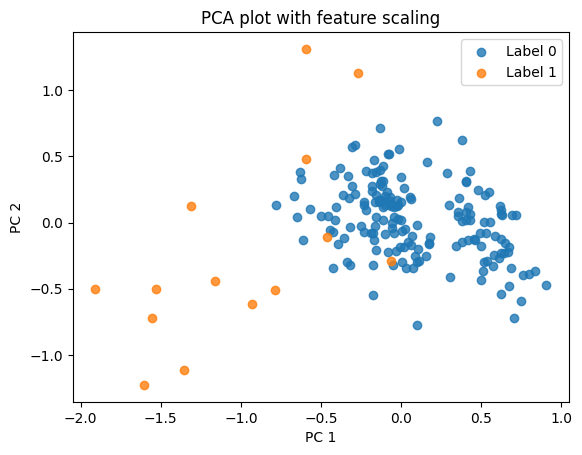

In [ ]:
train_data = pd.read_excel('/content/Training_Data_588_Project_Spring2025.xlsx')

X_train = train_data.drop('Label', axis=1)
y_train = train_data['Label']

pca = PCA(n_components=2)

scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_train_pca = pca.fit_transform(X_train_normalized)

for label in np.unique(y_train):
    plt.scatter(X_train_pca[y_train == label, 0], X_train_pca[y_train == label, 1], label=f'Label {label}', alpha=0.8)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PCA plot with feature scaling')
plt.legend() # Add the legend
plt.show()

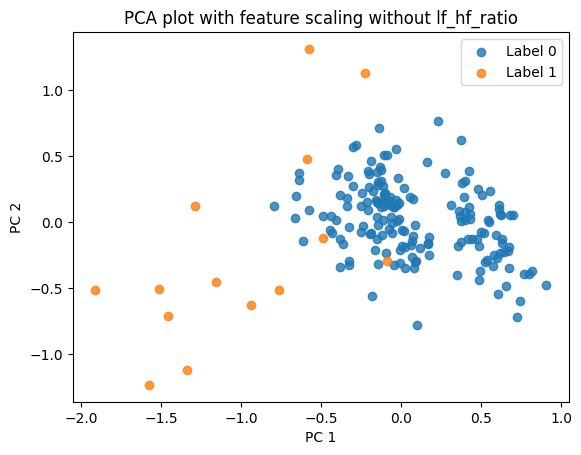

In [ ]:
train_data = pd.read_excel('/content/Training_Data_588_Project_Spring2025.xlsx')

X_train = train_data.drop('Label', axis=1)
X_train = X_train.drop('lf_hf_ratio', axis=1)

y_train = train_data['Label']

pca = PCA(n_components=2)

scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_train_pca = pca.fit_transform(X_train_normalized)

for label in np.unique(y_train):
    plt.scatter(X_train_pca[y_train == label, 0], X_train_pca[y_train == label, 1], label=f'Label {label}', alpha=0.8)


plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PCA plot with feature scaling without lf_hf_ratio')
plt.legend() # Add the legend
plt.show()


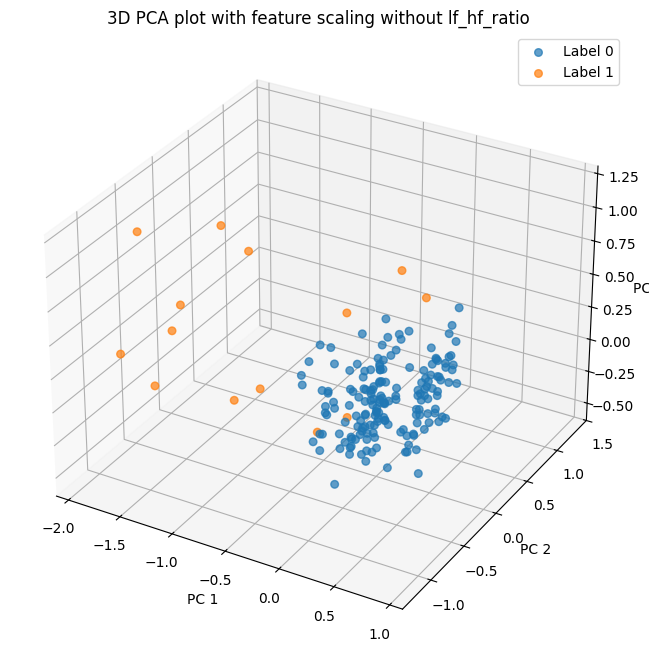

In [ ]:
train_data = pd.read_excel('/content/Training_Data_588_Project_Spring2025.xlsx')

X_train = train_data.drop('Label', axis=1)
X_train = X_train.drop('lf_hf_ratio', axis=1)

y_train = train_data['Label']


pca = PCA(n_components=3)
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_train_pca = pca.fit_transform(X_train_normalized)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for label in np.unique(y_train):
    ax.scatter(X_train_pca[y_train == label, 0], X_train_pca[y_train == label, 1], X_train_pca[y_train == label, 2], s=30, label=f'Label {label}', alpha=0.7)

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
plt.title('3D PCA plot with feature scaling without lf_hf_ratio')
ax.legend() # Add the legend

plt.show()

In [ ]:
train_data = pd.read_excel('/content/Training_Data_588_Project_Spring2025.xlsx')

X_train = train_data.drop('Label', axis=1)
X_train = X_train.drop('lf_hf_ratio', axis=1)

pca = PCA(n_components=10)
scaler = MinMaxScaler()
X_train_pca = pca.fit_transform(scaler.fit_transform(X_train))

print('Variance explained by each component:', pca.explained_variance_ratio_)


Variance explained by each component: [0.4642205  0.22938959 0.126842   0.06367691 0.03171743 0.02772809
 0.01646006 0.01535022 0.00839976 0.00758576]


# Training code

In [ ]:
train_data = pd.read_excel('/content/Training_Data_588_Project_Spring2025.xlsx')

X_train = train_data.drop('Label', axis=1)
X_train = X_train.drop('lf_hf_ratio', axis=1)

y_train = train_data['Label']

test_data_1 = pd.read_excel('/content/Test_Data_588_Project_Spring2025.xlsx', 'Group-1')
test_data_2 = pd.read_excel('/content/Test_Data_588_Project_Spring2025.xlsx', 'Group-2')
test_data_3 = pd.read_excel('/content/Test_Data_588_Project_Spring2025.xlsx', 'Group-3')
test_data_4 = pd.read_excel('/content/Test_Data_588_Project_Spring2025.xlsx', 'Group-4')

test_data_1 = test_data_1.drop('lf_hf_ratio', axis=1)
test_data_2 = test_data_2.drop('lf_hf_ratio', axis=1)
test_data_3 = test_data_3.drop('lf_hf_ratio', axis=1)
test_data_4 = test_data_4.drop('lf_hf_ratio', axis=1)

test_pred_1 = {}
test_pred_2 = {}
test_pred_3 = {}
test_pred_4 = {}

scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)

test_data_1_normalized = scaler.transform(test_data_1)
test_data_2_normalized = scaler.transform(test_data_2)
test_data_3_normalized = scaler.transform(test_data_3)
test_data_4_normalized = scaler.transform(test_data_4)

pca = PCA(n_components=3)
X_train_normalized = pca.fit_transform(X_train_normalized)

test_data_1_normalized = pca.transform(test_data_1_normalized)
test_data_2_normalized = pca.transform(test_data_2_normalized)
test_data_3_normalized = pca.transform(test_data_3_normalized)
test_data_4_normalized = pca.transform(test_data_4_normalized)


print('Logistic')
model_logistic = LogisticRegression(random_state=0)
model_logistic.fit(X_train_normalized, y_train)
train_pred = model_logistic.predict(X_train_normalized)
print(accuracy_score(y_train, train_pred), balanced_accuracy_score(y_train, train_pred), f1_score(y_train, train_pred))
print(train_pred.sum(), y_train.sum())
test_pred_1['model_logistic'] = model_logistic.predict(test_data_1_normalized)
test_pred_2['model_logistic'] = model_logistic.predict(test_data_2_normalized)
test_pred_3['model_logistic'] = model_logistic.predict(test_data_3_normalized)
test_pred_4['model_logistic'] = model_logistic.predict(test_data_4_normalized)


print('SVM linear')
model_svm_linear = SVC(kernel = 'linear', random_state=42)
model_svm_linear.fit(X_train_normalized, y_train)
train_pred = model_svm_linear.predict(X_train_normalized)
print(accuracy_score(y_train, train_pred), balanced_accuracy_score(y_train, train_pred), f1_score(y_train, train_pred))
print(train_pred.sum(), y_train.sum())
test_pred_1['model_svm_linear'] = model_svm_linear.predict(test_data_1_normalized)
test_pred_2['model_svm_linear'] = model_svm_linear.predict(test_data_2_normalized)
test_pred_3['model_svm_linear'] = model_svm_linear.predict(test_data_3_normalized)
test_pred_4['model_svm_linear'] = model_svm_linear.predict(test_data_4_normalized)


print('SVM rbf')
model_svm_rbf = SVC(kernel='rbf', random_state=42)
model_svm_rbf.fit(X_train_normalized, y_train)
train_pred = model_svm_rbf.predict(X_train_normalized)
print(accuracy_score(y_train, train_pred), balanced_accuracy_score(y_train, train_pred), f1_score(y_train, train_pred))
print(train_pred.sum(), y_train.sum())
test_pred_1['model_svm_rbf'] = model_svm_rbf.predict(test_data_1_normalized)
test_pred_2['model_svm_rbf'] = model_svm_rbf.predict(test_data_2_normalized)
test_pred_3['model_svm_rbf'] = model_svm_rbf.predict(test_data_3_normalized)
test_pred_4['model_svm_rbf'] = model_svm_rbf.predict(test_data_4_normalized)


print('SVM poly')
model_svm_poly = SVC(kernel='poly', random_state=42, degree=5)
model_svm_poly.fit(X_train_normalized, y_train)
train_pred = model_svm_poly.predict(X_train_normalized)
print(accuracy_score(y_train, train_pred), balanced_accuracy_score(y_train, train_pred), f1_score(y_train, train_pred))
print(train_pred.sum(), y_train.sum())
test_pred_1['model_svm_poly'] = model_svm_poly.predict(test_data_1_normalized)
test_pred_2['model_svm_poly'] = model_svm_poly.predict(test_data_2_normalized)
test_pred_3['model_svm_poly'] = model_svm_poly.predict(test_data_3_normalized)
test_pred_4['model_svm_poly'] = model_svm_poly.predict(test_data_4_normalized)


print('Decision Tree')
model_dt = DecisionTreeClassifier(random_state=42, max_depth=2)
model_dt.fit(X_train_normalized, y_train)
train_pred = model_dt.predict(X_train_normalized)
print(accuracy_score(y_train, train_pred), balanced_accuracy_score(y_train, train_pred), f1_score(y_train, train_pred))
print(train_pred.sum(), y_train.sum())
test_pred_1['model_dt'] = model_dt.predict(test_data_1_normalized)
test_pred_2['model_dt'] = model_dt.predict(test_data_2_normalized)
test_pred_3['model_dt'] = model_dt.predict(test_data_3_normalized)
test_pred_4['model_dt'] = model_dt.predict(test_data_4_normalized)



Logistic
0.9621621621621622 0.75 0.6666666666666666
7 14
SVM linear
0.9675675675675676 0.7857142857142857 0.7272727272727273
8 14
SVM rbf
0.9837837837837838 0.8928571428571428 0.88
11 14
SVM poly
0.9891891891891892 0.9285714285714286 0.9230769230769231
12 14
Decision Tree
0.9837837837837838 0.8928571428571428 0.88
11 14


SVM poly
0.9891891891891892 0.9285714285714286 0.9230769230769231
12 14


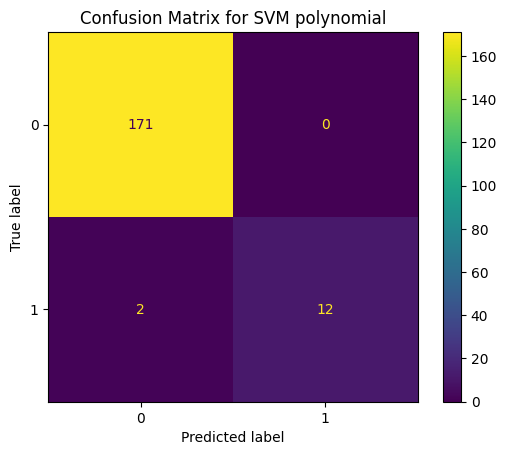

In [ ]:
print('SVM poly')
model_svm_poly = SVC(kernel='poly', random_state=42, degree=5)
model_svm_poly.fit(X_train_normalized, y_train)
train_pred = model_svm_poly.predict(X_train_normalized)
print(accuracy_score(y_train, train_pred), balanced_accuracy_score(y_train, train_pred), f1_score(y_train, train_pred))

print(train_pred.sum(), y_train.sum())
test_pred_1['model_svm_poly'] = model_svm_poly.predict(test_data_1_normalized)
test_pred_2['model_svm_poly'] = model_svm_poly.predict(test_data_2_normalized)
test_pred_3['model_svm_poly'] = model_svm_poly.predict(test_data_3_normalized)
test_pred_4['model_svm_poly'] = model_svm_poly.predict(test_data_4_normalized)


disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_train, train_pred))
disp.plot()

plt.title('Confusion Matrix for SVM polynomial')
plt.show()



Decision Tree
0.9837837837837838 0.8928571428571428 0.88
11 14


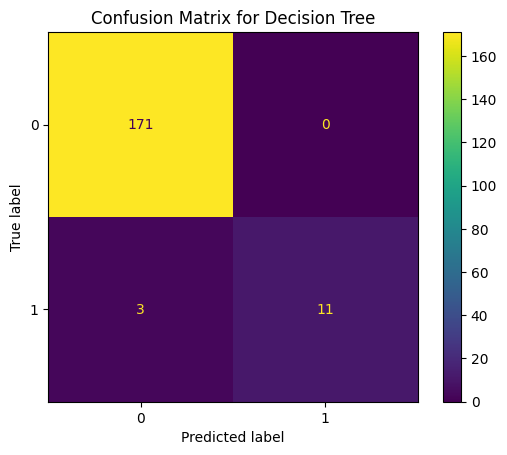

In [ ]:
print('Decision Tree')
model_dt = DecisionTreeClassifier(random_state=42, max_depth=2)
model_dt.fit(X_train_normalized, y_train)
train_pred = model_dt.predict(X_train_normalized)
print(accuracy_score(y_train, train_pred), balanced_accuracy_score(y_train, train_pred), f1_score(y_train, train_pred))
print(train_pred.sum(), y_train.sum())
test_pred_1['model_dt'] = model_dt.predict(test_data_1_normalized)
test_pred_2['model_dt'] = model_dt.predict(test_data_2_normalized)
test_pred_3['model_dt'] = model_dt.predict(test_data_3_normalized)
test_pred_4['model_dt'] = model_dt.predict(test_data_4_normalized)


disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_train, train_pred))
disp.plot()

plt.title('Confusion Matrix for Decision Tree')
plt.show()

In [ ]:
test_pred_1['model_svm_poly'], test_pred_1['model_dt']

(array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0]),
 array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0]))

In [ ]:
test_pred_2['model_svm_poly']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
combined_res_svm = np.column_stack((test_pred_1['model_svm_poly'],test_pred_2['model_svm_poly'],test_pred_3['model_svm_poly'],test_pred_4['model_svm_poly']))

In [ ]:
from google.colab import files

In [ ]:
df = pd.DataFrame(combined_res_svm)
print(df)
df.to_excel("SVM_pred.xlsx")
files.download("SVM_pred.xlsx")

    0  1  2  3
0   0  0  0  0
1   0  0  0  0
2   1  0  1  0
3   0  0  1  0
4   0  0  0  0
.. .. .. .. ..
95  1  0  0  0
96  0  0  0  0
97  0  0  0  0
98  0  0  0  0
99  0  0  0  0

[100 rows x 4 columns]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df = pd.DataFrame(combined_res_svm)
print(df)
df.to_csv("test_predictions.csv")
files.download("test_predictions.csv")

    0  1  2  3
0   0  0  0  0
1   0  0  0  0
2   1  0  1  0
3   0  0  1  0
4   0  0  0  0
.. .. .. .. ..
95  1  0  0  0
96  0  0  0  0
97  0  0  0  0
98  0  0  0  0
99  0  0  0  0

[100 rows x 4 columns]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
combined_res_dt = np.column_stack((test_pred_1['model_dt'],test_pred_2['model_dt'],test_pred_3['model_dt'],test_pred_4['model_dt']))

In [ ]:
df = pd.DataFrame(combined_res_dt)
print(df)
df.to_csv("test_predictions_dt.csv")
files.download("test_predictions_dt.csv")

    0  1  2  3
0   0  0  0  0
1   0  0  0  0
2   1  0  1  0
3   0  1  0  0
4   1  0  0  0
.. .. .. .. ..
95  1  0  0  0
96  0  0  0  0
97  0  0  0  0
98  0  0  0  0
99  0  0  0  0

[100 rows x 4 columns]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df = pd.DataFrame(combined_res_dt)
print(df)
df.to_excel("DT_pred.xlsx")
files.download("DT_pred.xlsx")

    0  1  2  3
0   0  0  0  0
1   0  0  0  0
2   1  0  1  0
3   0  1  0  0
4   1  0  0  0
.. .. .. .. ..
95  1  0  0  0
96  0  0  0  0
97  0  0  0  0
98  0  0  0  0
99  0  0  0  0

[100 rows x 4 columns]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>